In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
from sklearn.datasets import load_breast_cancer

In [5]:
breast_cancer_datasets = load_breast_cancer()

In [6]:
print (breast_cancer_datasets. DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [7]:
cancer = pd.DataFrame(breast_cancer_datasets.data,
                     columns = breast_cancer_datasets.feature_names)

In [8]:
cancer['Y'] = breast_cancer_datasets.target

In [10]:
cancer.corr().round(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Y
mean radius,1.00,0.32,1.00,0.99,0.17,0.51,0.68,0.82,0.15,-0.31,...,0.30,0.97,0.94,0.12,0.41,0.53,0.74,0.16,0.01,-0.73
mean texture,0.32,1.00,0.33,0.32,-0.02,0.24,0.30,0.29,0.07,-0.08,...,0.91,0.36,0.34,0.08,0.28,0.30,0.30,0.11,0.12,-0.42
mean perimeter,1.00,0.33,1.00,0.99,0.21,0.56,0.72,0.85,0.18,-0.26,...,0.30,0.97,0.94,0.15,0.46,0.56,0.77,0.19,0.05,-0.74
mean area,0.99,0.32,0.99,1.00,0.18,0.50,0.69,0.82,0.15,-0.28,...,0.29,0.96,0.96,0.12,0.39,0.51,0.72,0.14,0.00,-0.71
mean smoothness,0.17,-0.02,0.21,0.18,1.00,0.66,0.52,0.55,0.56,0.58,...,0.04,0.24,0.21,0.81,0.47,0.43,0.50,0.39,0.50,-0.36
mean compactness,0.51,0.24,0.56,0.50,0.66,1.00,0.88,0.83,0.60,0.57,...,0.25,0.59,0.51,0.57,0.87,0.82,0.82,0.51,0.69,-0.60
mean concavity,0.68,0.30,0.72,0.69,0.52,0.88,1.00,0.92,0.50,0.34,...,0.30,0.73,0.68,0.45,0.75,0.88,0.86,0.41,0.51,-0.70
mean concave points,0.82,0.29,0.85,0.82,0.55,0.83,0.92,1.00,0.46,0.17,...,0.29,0.86,0.81,0.45,0.67,0.75,0.91,0.38,0.37,-0.78
mean symmetry,0.15,0.07,0.18,0.15,0.56,0.60,0.50,0.46,1.00,0.48,...,0.09,0.22,0.18,0.43,0.47,0.43,0.43,0.70,0.44,-0.33
mean fractal dimension,-0.31,-0.08,-0.26,-0.28,0.58,0.57,0.34,0.17,0.48,1.00,...,-0.05,-0.21,-0.23,0.50,0.46,0.35,0.18,0.33,0.77,0.01


# 使用所有資料

In [11]:
X = cancer.loc[:, 'mean radius': 'worst fractal dimension'].values
Y = cancer.Y

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,
                                                   test_size = 0.2,
                                                   random_state = 0)

In [13]:
model = LinearRegression()

In [14]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
y_predict = model.predict(x_test)

In [17]:
import seaborn as sns
sns.set()

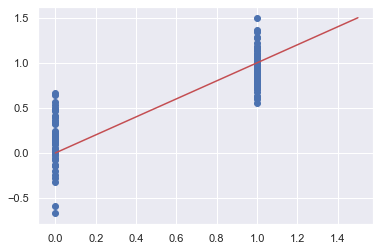

In [20]:
plt.scatter(y_test, y_predict)
plt.plot([0, 1.5], [0, 1.5], 'r')

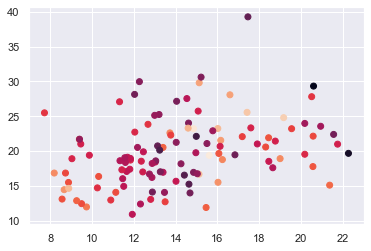

In [22]:
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_predict-y_test)